<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets practice loading and exploring some data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/mbrudd/csci290/raw/main/data/stroke.csv")

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df["stroke"].unique()

array([1, 0])

In [8]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [10]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


In [11]:
df["stroke"].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


In [12]:
df['stroke'].mean()

0.0487279843444227

<Axes: xlabel='age', ylabel='stroke'>

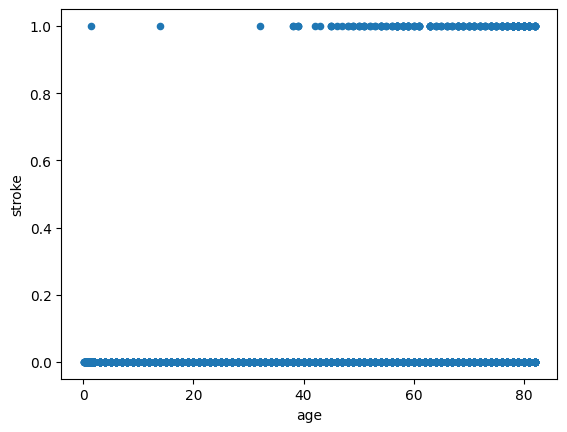

In [13]:
df.plot(x= "age", y="stroke", kind= 'scatter')

In [14]:
df['age'].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [15]:
df['age_cat'] = pd.cut(df['age'], bins = [0,25,45,61,100], labels = ['young', 'adult', 'middle-aged', 'old'] )

In [16]:
df['age_cat'].value_counts()

,count
age_cat,
adult,1325
young,1293
middle-aged,1264
old,1228


In [17]:
df.groupby('age_cat', observed=True )['stroke'].mean()

,stroke
age_cat,
young,0.001547
adult,0.008302
middle-aged,0.051424
old,0.139251


In [18]:
df.groupby('heart_disease')['stroke'].mean()

,stroke
heart_disease,
0,0.041787
1,0.170290


In [19]:
df.groupby(['heart_disease', 'hypertension', 'ever_married', 'gender'])['stroke'].mean()

heart_disease  hypertension  ever_married  gender
0              0             No            Female    0.011591
                                           Male      0.005472
                                           Other     0.000000
                             Yes           Female    0.046884
                                           Male      0.053191
               1             No            Female    0.185185
                                           Male      0.117647
                             Yes           Female    0.122727
                                           Male      0.111765
1              0             No            Female    0.166667
                                           Male      0.090909
                             Yes           Female    0.138889
                                           Male      0.179487
               1             No            Female    0.600000
                                           Male      0.250000
                             Yes           Female    0.166667
                                           Male      0.161290
Name: stroke, dtype: float64

## Build and assess a simple classifier

In [20]:
df["prediction"] = df["age"] > 61

In [21]:
df["prediction"].value_counts()

,count
prediction,
False,3882
True,1228


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
cm = confusion_matrix(df["stroke"], df["prediction"])

Stuff on left to right diagonal is correct, the others are false


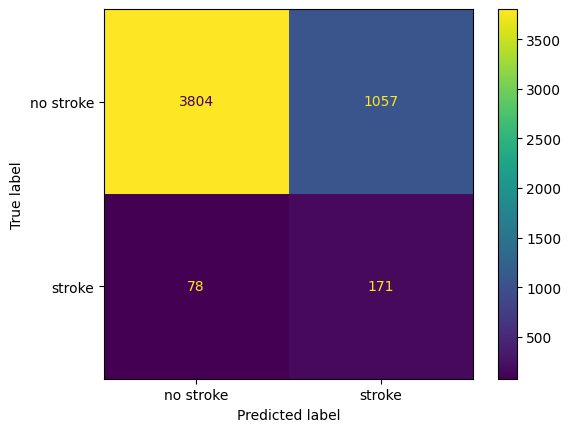

In [24]:
ConfusionMatrixDisplay(cm, display_labels = ["no stroke", "stroke"]).plot()

## Build and assess a simple classifier

In [25]:
df["prediction"]= df["age"] > 25

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
cm = confusion_matrix(df["stroke"], df["prediction"])
cm

array([[1291, 3570],
       [   2,  247]])

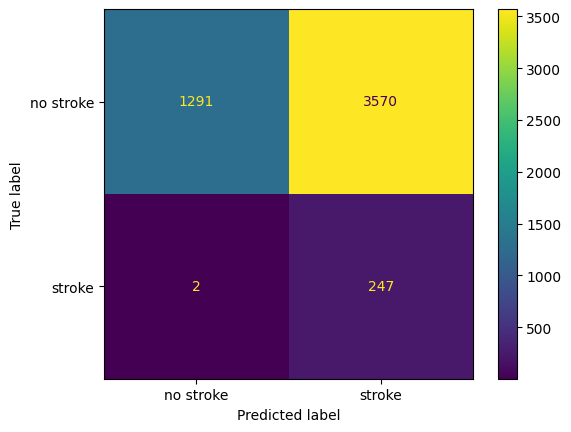

In [28]:
ConfusionMatrixDisplay(cm, display_labels = ["no stroke", "stroke"]).plot()

In [29]:
tn, fp , fn, tp = confusion_matrix(df["stroke"], df["prediction"]).ravel()
tn, fp , fn, tp

(1291, 3570, 2, 247)

In [30]:
import sklearn.metrics as metrics

In [31]:
metrics.recall_score(df["stroke"], df["prediction"])

0.9919678714859438

In [32]:
tp

247

In [33]:
tp/(tp+fn)

0.9919678714859438

In [34]:
metrics.precision_score(df["stroke"], df["prediction"])

0.06471050563269583

In [35]:
tp / (tp + fp)

0.06471050563269583

In [36]:
def precision_vs_recall(threshold):
  df["prediction"]= df["age"] > threshold
  return metrics.precision_score(df["stroke"], df["prediction"]), metrics.recall_score(df["stroke"], df["prediction"])

In [37]:
precision_vs_recall (25)

(0.06471050563269583, 0.9919678714859438)

In [38]:
precisions = []
recalls = []
thresholds = range(0,83)
for threshold in thresholds:
  precision, recall = precision_vs_recall(threshold)
  precisions.append(precision)
  recalls.append(recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
pr = pd.DataFrame(
    {"thresholds": thresholds,
    "precision": precisions,
    "recall": recalls
})

In [40]:
pr.head()

,thresholds,precision,recall
0,0,0.048728,1.000000
1,1,0.049190,1.000000
2,2,0.050253,0.995984
3,3,0.050726,0.995984
4,4,0.051081,0.995984


In [41]:
pr.tail()

,thresholds,precision,recall
78,78,0.210332,0.228916
79,79,0.215054,0.160643
80,80,0.198276,0.092369
81,81,0.160714,0.036145
82,82,0.000000,0.000000


<Axes: xlabel='thresholds'>

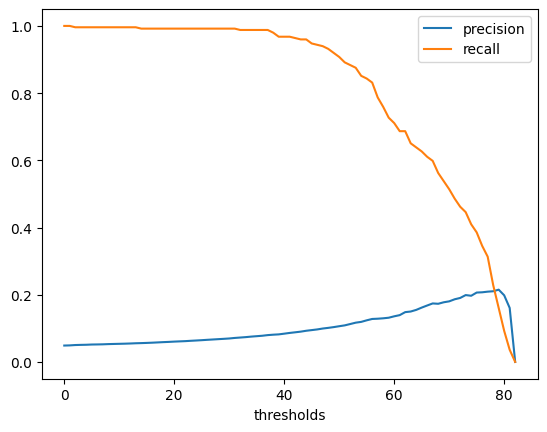

In [42]:
pr.plot(x= "thresholds" , y= ["precision", "recall"])

In [44]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [45]:
train_set.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_cat', 'prediction'],
      dtype='object')

In [49]:
train_set = train_set[["gender", "age", "hypertension", "heart_disease", "smoking_status", "stroke"]]

In [50]:
test_set= test_set[["gender", "age", "hypertension", "heart_disease", "smoking_status", "stroke"]]

In [51]:
X_train = train_set[["gender", "age", "hypertension", "heart_disease", "smoking_status"]]
y_train = train_set["stroke"]

In [52]:
X_test = test_set[["gender", "age", "hypertension", "heart_disease", "smoking_status"]]
y_test = test_set["stroke"]

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DecisionTreeClassifier(max_depth =3).fit(X_train, y_train)

ValueError: could not convert string to float: 'Female'

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree




In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 943 to 3011
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4088 non-null   object 
 1   age             4088 non-null   float64
 2   hypertension    4088 non-null   int64  
 3   heart_disease   4088 non-null   int64  
 4   smoking_status  4088 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 191.6+ KB


In [58]:
num_attributes= X_train.select_dtypes(include=['float64', 'int64']).columns
cat_attributes= X_train.select_dtypes(include=['object']).columns

In [59]:
num_attributes

Index(['age', 'hypertension', 'heart_disease'], dtype='object')

In [60]:
trf = [ ('num', StandardScaler(), num_attributes),
          ('cat', OneHotEncoder(handle_unknown= 'ignore'), cat_attributes) ]
col_transform= ColumnTransformer(transformers= trf)

In [61]:
pipeline= Pipeline( steps = [('pre', col_transform), ('clf', DecisionTreeClassifier(max_depth =3))])

In [72]:
cross_val_score( pipeline, X_train, y_train, cv=3, scoring = 'accuracy')

array([0.9515774 , 0.9515774 , 0.95154185])

In [69]:
model = pipeline.fit(X_train, y_train)
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'hypertension', 'heart_disease'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'smoking_status'], dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [70]:
predictions= pipeline.predict(X_test)

In [73]:
cm = confusion_matrix(y_test, predictions)
cm

array([[971,   0],
       [ 51,   0]])